<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<h3>Importing Data Files</h3>

In [2]:
data_flight = pd.read_csv('flights.csv')
airline_data = pd.read_csv('airlines.csv')
airport_data = pd.read_csv('airports.csv')

C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_flight = data_flight.fillna(0)
data_pred = data_flight
data_flight = data_flight.loc[data_flight['MONTH'] < 4]
print('Data Size : ', data_flight.shape)

Data Size :  (1403471, 31)


<h3>Data Preprocessing</h3>

In [4]:
airline_abbr = airline_data['IATA_CODE'].values.tolist()
airport_abbr = airport_data['IATA_CODE'].values.tolist()

airline_full = airline_data['AIRLINE'].values.tolist()
airport_full = airport_data['AIRPORT'].values.tolist()

city = airport_data['CITY'].values.tolist()

In [5]:
airline = {} 
airport = {}
airport_city = {}

for key in airport_abbr: 
    for value in city: 
        airport_city[key] = value 
        city.remove(value) 
        break
        
for key in airline_abbr: 
    for value in airline_full: 
        airline[key] = value 
        airline_full.remove(value) 
        break
        
for key in airport_abbr: 
    for value in airport_full: 
        airport[key] = value 
        airport_full.remove(value) 
        break

In [6]:
data_flight.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
data_flight['AIRLINE_FULL'] = data_flight['AIRLINE']
data_flight['ORIGIN_AIRPORT_FULL'] = data_flight['ORIGIN_AIRPORT']
data_flight['ORIGIN_CITY'] = data_flight['ORIGIN_AIRPORT']
data_flight['DESTINATION_AIRPORT_FULL'] = data_flight['DESTINATION_AIRPORT']
data_flight['DESTINATION_CITY'] = data_flight['DESTINATION_AIRPORT']

data_flight = pd.DataFrame(data_flight[['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'AIRLINE_FULL', 
'ORIGIN_AIRPORT', 'ORIGIN_AIRPORT_FULL', 'ORIGIN_CITY', 'DESTINATION_AIRPORT', 'DESTINATION_AIRPORT_FULL', 'DESTINATION_CITY', 
'DISTANCE', 'SCHEDULED_DEPARTURE','DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL','ARRIVAL_DELAY', 'SCHEDULED_TIME','ELAPSED_TIME',]])

C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [8]:
data_flight = data_flight.replace({"AIRLINE_FULL": airline})

data_flight = data_flight.replace({"ORIGIN_AIRPORT_FULL": airport})
data_flight = data_flight.replace({"ORIGIN_CITY": city})

data_flight = data_flight.replace({"DESTINATION_AIRPORT_FULL": airport})
data_flight = data_flight.replace({"DESTINATION_CITY": airport_city})

data_flight.head()

,DAY,DAY_OF_WEEK,AIRLINE,AIRLINE_FULL,ORIGIN_AIRPORT,ORIGIN_AIRPORT_FULL,ORIGIN_CITY,DESTINATION_AIRPORT,DESTINATION_AIRPORT_FULL,DESTINATION_CITY,DISTANCE,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,1,4,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,ANC,SEA,Seattle-Tacoma International Airport,Seattle,1448,5,-11.0,430,-22.0,205.0,194.0
1,1,4,AA,American Airlines Inc.,LAX,Los Angeles International Airport,LAX,PBI,Palm Beach International Airport,West Palm Beach,2330,10,-8.0,750,-9.0,280.0,279.0
2,1,4,US,US Airways Inc.,SFO,San Francisco International Airport,SFO,CLT,Charlotte Douglas International Airport,Charlotte,2296,20,-2.0,806,5.0,286.0,293.0
3,1,4,AA,American Airlines Inc.,LAX,Los Angeles International Airport,LAX,MIA,Miami International Airport,Miami,2342,20,-5.0,805,-9.0,285.0,281.0
4,1,4,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,SEA,ANC,Ted Stevens Anchorage International Airport,Anchorage,1448,25,-1.0,320,-21.0,235.0,215.0


<h3>Data Visualization</h3>

No. of flights taking of on airports

C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  import sys
C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


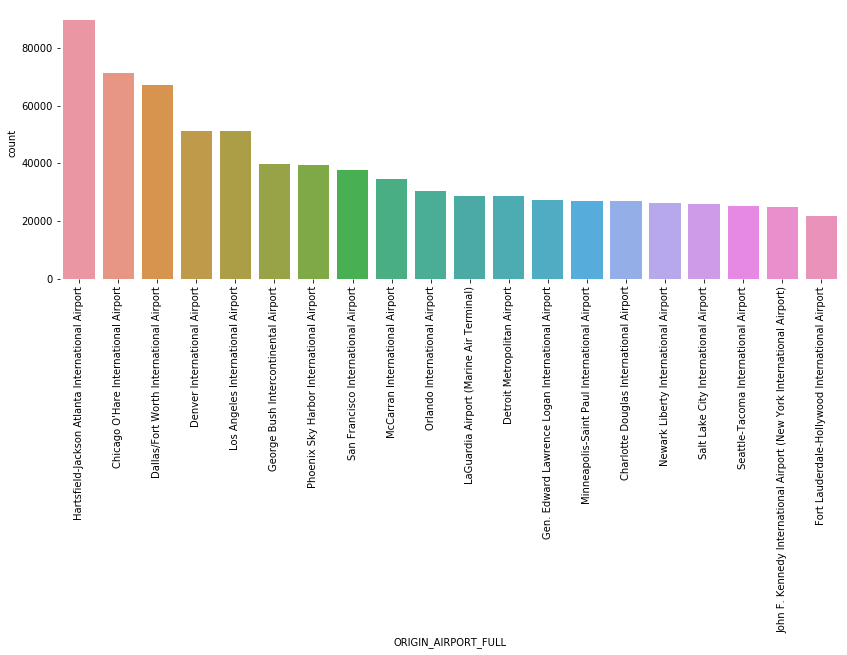

In [9]:
chart = plt.figure(figsize=(14, 5))
axis = sns.countplot(x=data_flight['ORIGIN_AIRPORT_FULL'], data = data_flight,
              order=data_flight['ORIGIN_AIRPORT_FULL'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="center")
sns.despine(bottom=True, left=True)

chart.tight_layout()
chart.show()

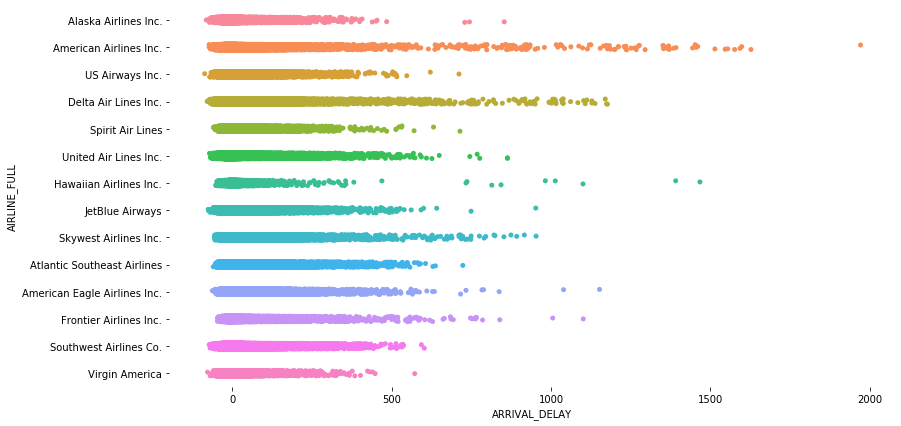

In [10]:
axis = plt.subplots(figsize=(13,7))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE_FULL",
              data = data_flight, dodge=True, jitter=True)
plt.show()

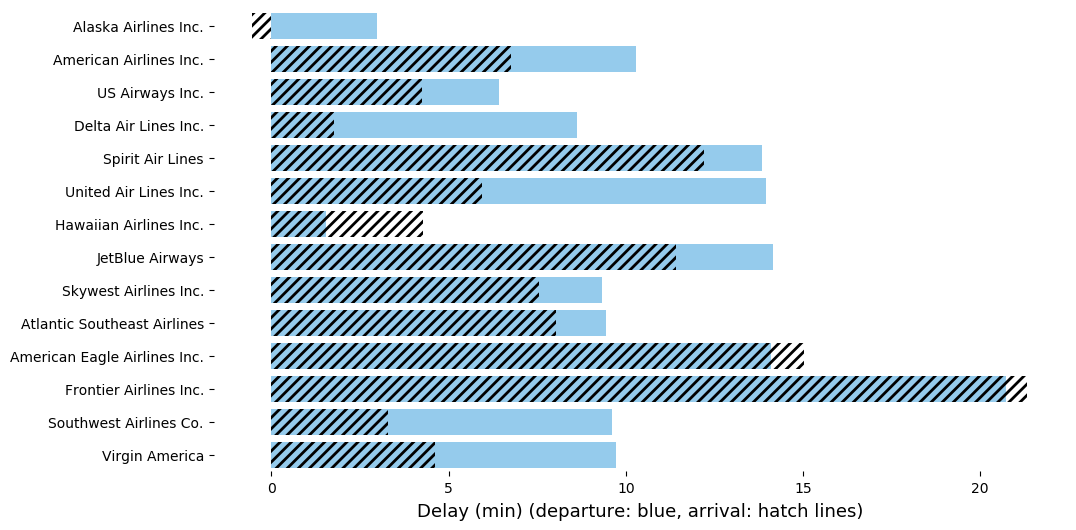

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE_FULL", data=data_flight, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE_FULL", data=data_flight, color="r", hatch = '///',
                 alpha = 0.0, ci=None)

ax.yaxis.label.set_visible(False)
plt.xlabel('Delay (min) (departure: blue, arrival: hatch lines)',
           fontsize=13, labelpad=5);
sns.despine(bottom=True, left=True)


In [9]:
dataset = data_flight
dataset['DELAYED'] = np.where(dataset['ARRIVAL_DELAY'].astype(int) >= 10, 1, 0)
dataset = pd.DataFrame(dataset[['DAY' ,'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
                    'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'DELAYED']])
dataset.head()

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DELAYED
0,1,4,AS,ANC,SEA,1448,5,-11.0,430,-22.0,0
1,1,4,AA,LAX,PBI,2330,10,-8.0,750,-9.0,0
2,1,4,US,SFO,CLT,2296,20,-2.0,806,5.0,0
3,1,4,AA,LAX,MIA,2342,20,-5.0,805,-9.0,0
4,1,4,AS,SEA,ANC,1448,25,-1.0,320,-21.0,0


<h3>Encoding Data</h3>

In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

integer_encoded_airline = label_encoder.fit_transform(airline_abbr).tolist()
integer_encoded_airport = label_encoder.fit_transform(airport_abbr).tolist()

le_airline = {} 
le_airport = {}

for key in airline_abbr: 
    for value in integer_encoded_airline: 
        le_airline[key] = value 
        integer_encoded_airline.remove(value) 
        break
        
for key in airport_abbr: 
    for value in integer_encoded_airport: 
        le_airport[key] = value 
        integer_encoded_airport.remove(value) 
        break
        
dataset.head()

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DELAYED
0,1,4,AS,ANC,SEA,1448,5,-11.0,430,-22.0,0
1,1,4,AA,LAX,PBI,2330,10,-8.0,750,-9.0,0
2,1,4,US,SFO,CLT,2296,20,-2.0,806,5.0,0
3,1,4,AA,LAX,MIA,2342,20,-5.0,805,-9.0,0
4,1,4,AS,SEA,ANC,1448,25,-1.0,320,-21.0,0


In [11]:
dataset = dataset.replace({"AIRLINE": le_airline})
dataset = dataset.replace({"ORIGIN_AIRPORT": le_airport})
dataset = dataset.replace({"DESTINATION_AIRPORT": le_airport})

dataset.head()

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DELAYED
0,1,4,1,17,277,1448,5,-11.0,430,-22.0,0
1,1,4,0,176,235,2330,10,-8.0,750,-9.0,0
2,1,4,11,278,66,2296,20,-2.0,806,5.0,0
3,1,4,0,176,203,2342,20,-5.0,805,-9.0,0
4,1,4,1,277,17,1448,25,-1.0,320,-21.0,0


In [25]:
le_airline

{'UA': 10,
 'AA': 0,
 'US': 11,
 'F9': 5,
 'B6': 2,
 'OO': 9,
 'AS': 1,
 'NK': 8,
 'WN': 13,
 'DL': 3,
 'EV': 4,
 'HA': 6,
 'MQ': 7,
 'VX': 12}

In [26]:
le_airport

{'ABE': 0,
 'ABI': 1,
 'ABQ': 2,
 'ABR': 3,
 'ABY': 4,
 'ACK': 5,
 'ACT': 6,
 'ACV': 7,
 'ACY': 8,
 'ADK': 9,
 'ADQ': 10,
 'AEX': 11,
 'AGS': 12,
 'AKN': 13,
 'ALB': 14,
 'ALO': 15,
 'AMA': 16,
 'ANC': 17,
 'APN': 18,
 'ASE': 19,
 'ATL': 20,
 'ATW': 21,
 'AUS': 22,
 'AVL': 23,
 'AVP': 24,
 'AZO': 25,
 'BDL': 26,
 'BET': 27,
 'BFL': 28,
 'BGM': 29,
 'BGR': 30,
 'BHM': 31,
 'BIL': 32,
 'BIS': 33,
 'BJI': 34,
 'BLI': 35,
 'BMI': 36,
 'BNA': 37,
 'BOI': 38,
 'BOS': 39,
 'BPT': 40,
 'BQK': 41,
 'BQN': 42,
 'BRD': 43,
 'BRO': 44,
 'BRW': 45,
 'BTM': 46,
 'BTR': 47,
 'BTV': 48,
 'BUF': 49,
 'BUR': 50,
 'BWI': 51,
 'BZN': 52,
 'CAE': 53,
 'CAK': 54,
 'CDC': 55,
 'CDV': 56,
 'CEC': 57,
 'CHA': 58,
 'CHO': 59,
 'CHS': 60,
 'CID': 61,
 'CIU': 62,
 'CLD': 63,
 'CLE': 64,
 'CLL': 65,
 'CLT': 66,
 'CMH': 67,
 'CMI': 68,
 'CMX': 69,
 'CNY': 70,
 'COD': 71,
 'COS': 72,
 'COU': 73,
 'CPR': 74,
 'CRP': 75,
 'CRW': 76,
 'CSG': 77,
 'CVG': 78,
 'CWA': 79,
 'DAB': 80,
 'DAL': 81,
 'DAY': 82,
 'DBQ': 83,
 '

<h3>Splitting & Scaling the Data </h3>

In [12]:
X = dataset.drop('DELAYED', axis=1)
y = dataset['DELAYED']

In [13]:
# from sklearn.cluster import KMeans
# distortions = []
# for i in range(1, 9):
#     km = KMeans(n_clusters=i)
    
#     km.fit(X)
#     distortions.append(km.inertia_)

# import matplotlib.pyplot as plt

# # plot
# plt.plot(range(1, 9), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()

In [14]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution

print('Original Data : ', X.shape)
print('Undersampled Data : ', X_over.shape)

X = X_over
y = y_over

Using TensorFlow backend.


Original Data :  (1403471, 10)
Undersampled Data :  (706224, 10)


In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)

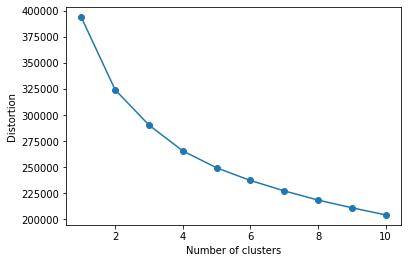

In [16]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    
    km.fit(X)
    distortions.append(km.inertia_)

import matplotlib.pyplot as plt

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6).fit(X)

In [17]:
X_dataframe = pd.DataFrame({'DAY': X[:, 0], 'DAY_OF_WEEK': X[:, 1], 'AIRLINE': X[:, 2], 'ORIGIN_AIRPORT': X[:, 3], 
'DESTINATION_AIRPORT': X[:, 4], 'DISTANCE': X[:, 5], 'SCHEDULED_DEPARTURE': X[:, 6], 'DEPARTURE_DELAY': X[:, 7], 
'SCHEDULED_ARRIVAL': X[:, 8], 'ARRIVAL_DELAY': X[:, 9]})

In [18]:
labels = pd.DataFrame(kmeans.labels_) 
labeledColleges = pd.concat((X_dataframe,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'CLUSTER'},axis=1)

In [19]:
labeledColleges.head()

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,CLUSTER
0,0.766667,0.166667,0.692308,0.903427,0.710280,0.028877,0.722646,0.027330,0.753647,0.031220,0
1,0.866667,0.166667,0.230769,0.062305,0.355140,0.111066,0.687871,0.036115,0.755732,0.038049,3
2,0.133333,0.500000,0.000000,0.601246,0.548287,0.441640,0.692960,0.029283,0.797416,0.028293,4
3,0.300000,0.166667,0.230769,0.866044,0.517134,0.515953,0.485157,0.024890,0.842018,0.032683,4
4,0.166667,0.166667,1.000000,0.635514,0.601246,0.209006,0.315522,0.027818,0.474781,0.035122,0


C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


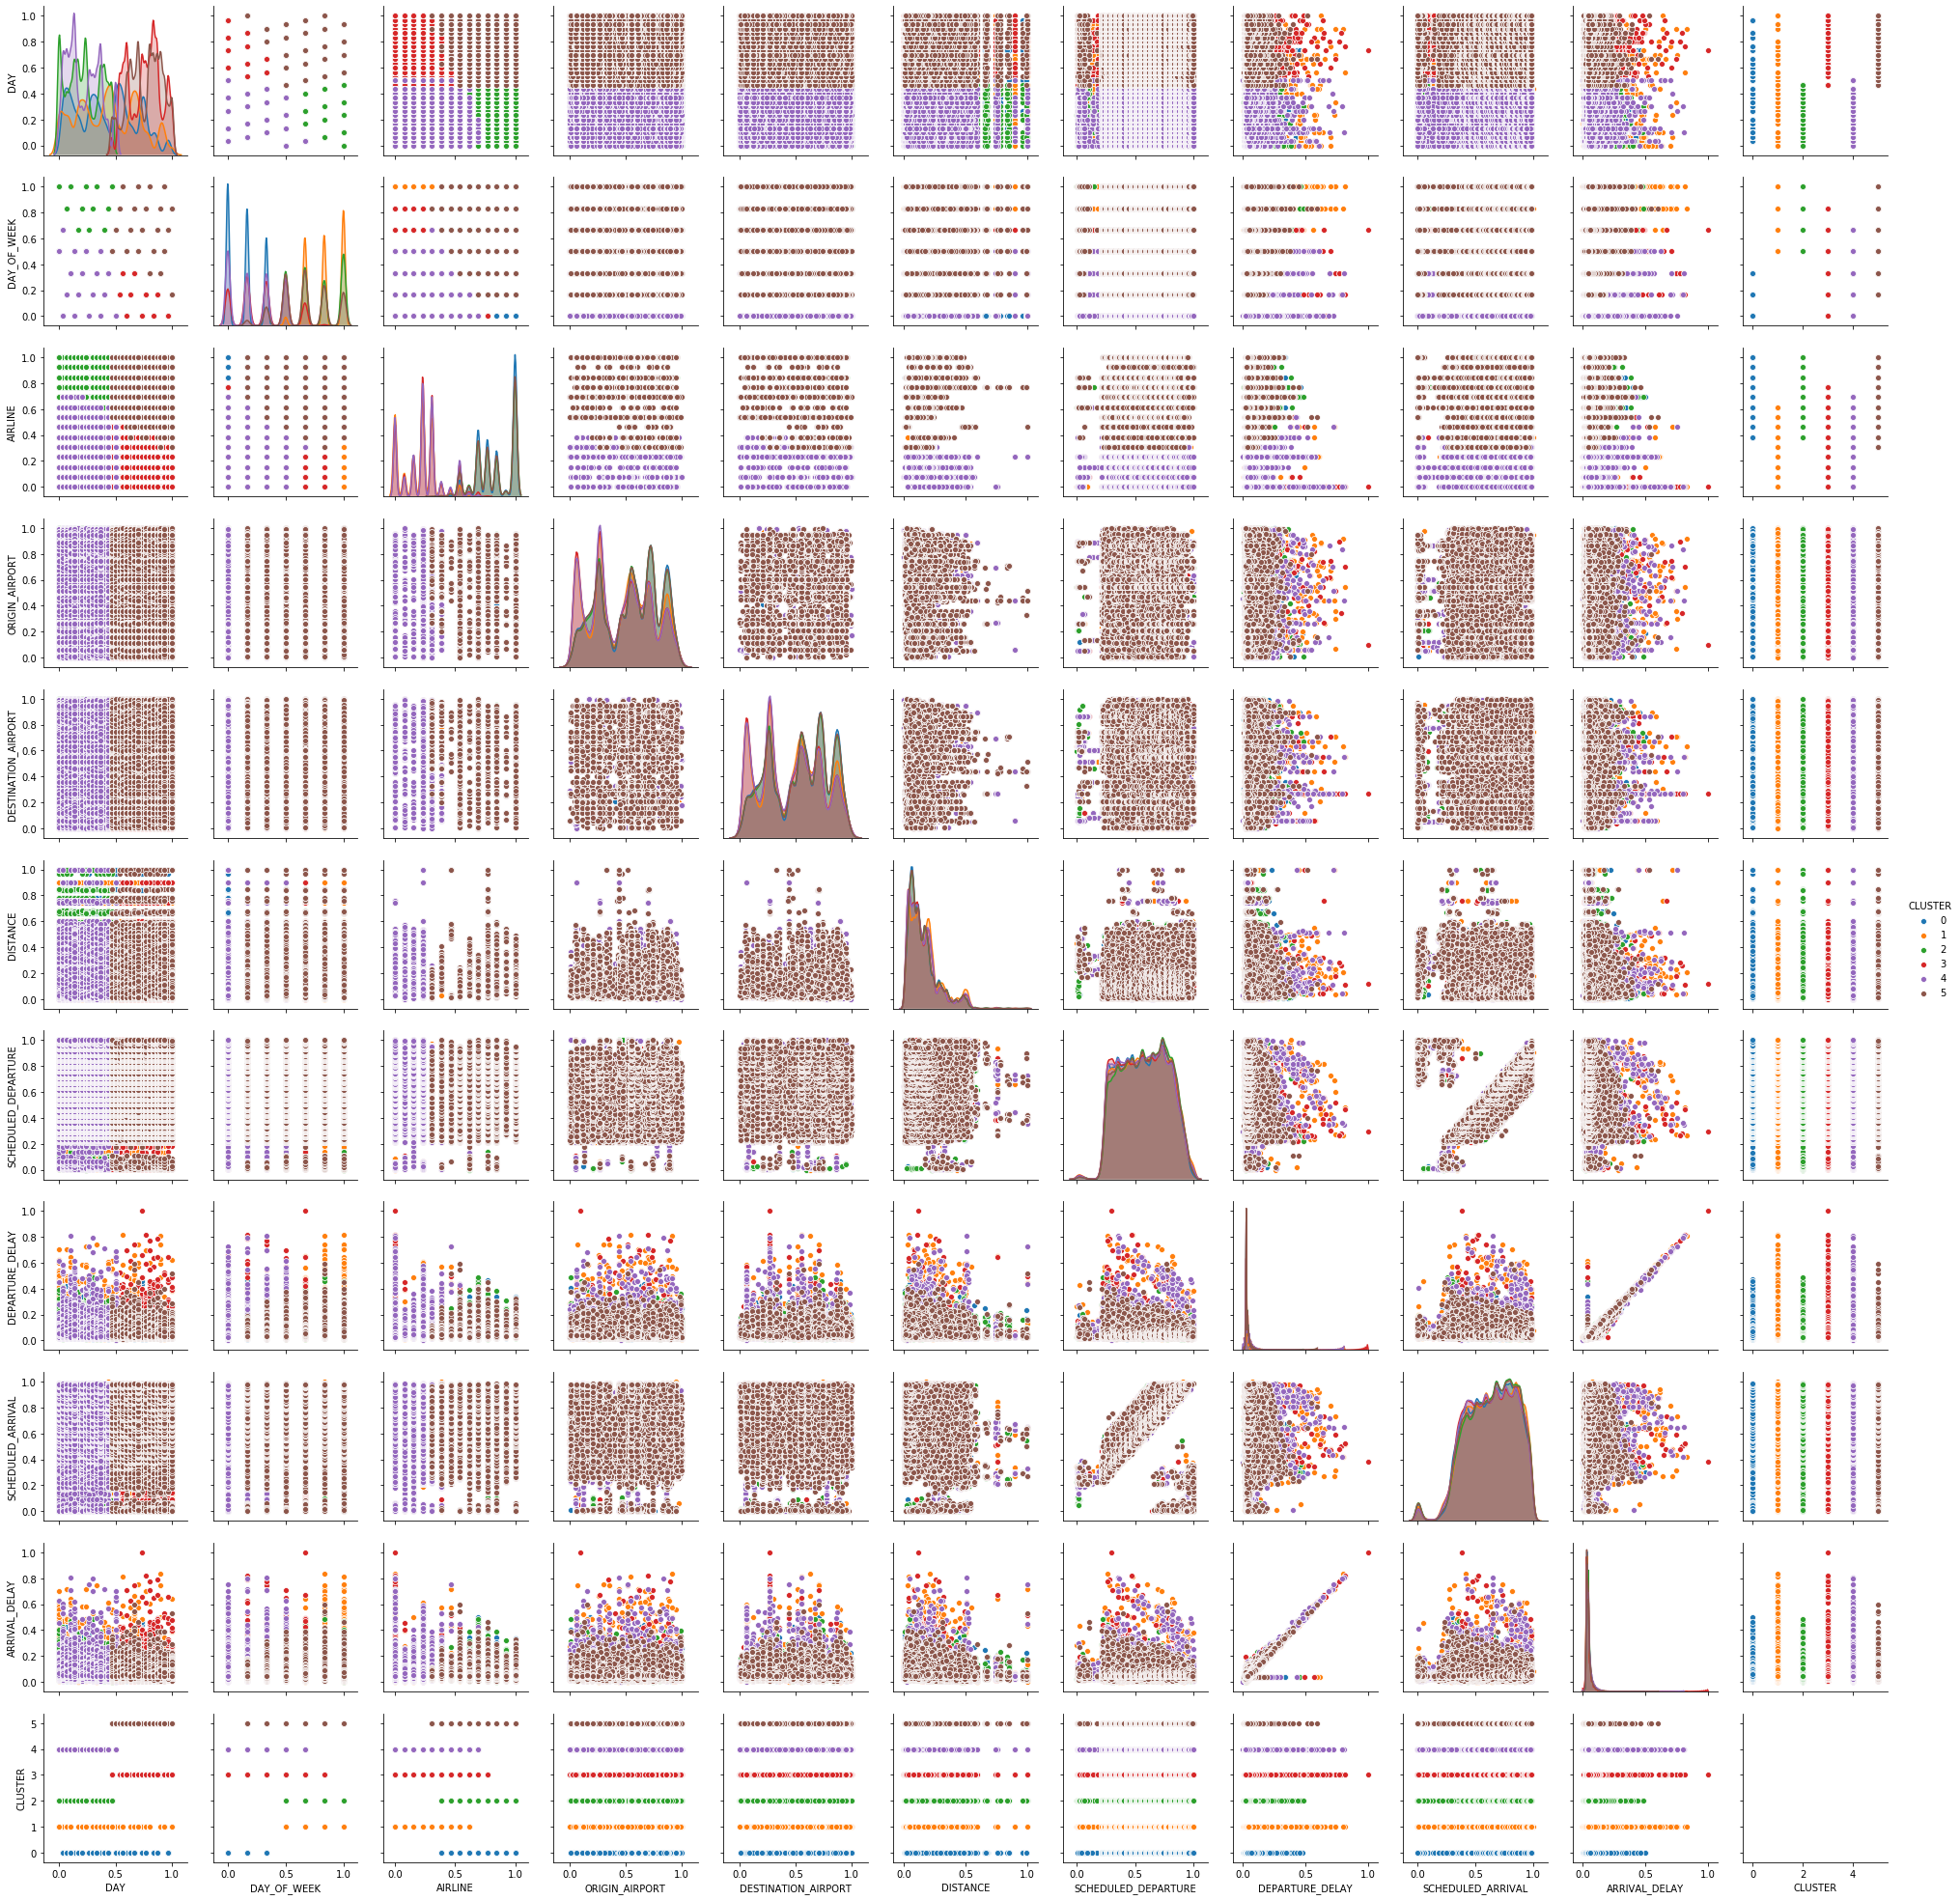

In [20]:
sns.pairplot(labeledColleges,hue='CLUSTER')

In [22]:
X = min_max_scaler.fit_transform(X_dataframe)

In [23]:
from sklearn.model_selection import train_test_split
train_x, val_x_and_test_x, train_y, val_y_and_test_y = train_test_split(X, y, test_size=0.3)
val_x, test_x, val_y, test_y = train_test_split(val_x_and_test_x, val_y_and_test_y, test_size=0.5)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape, val_x.shape, val_y.shape)

(494356, 10) (494356,) (105934, 10) (105934,) (105934, 10) (105934,)


<h3>BPN & RBF Model</h3>

In [25]:
from keras import Sequential, initializers
from keras.layers import Dense, Dropout

from rbflayer import RBFLayer
from kmeans_initializer import InitCentersKMeans

In [26]:
classifier = Sequential([    
    Dense(6, activation='sigmoid', input_shape=(10,)),  
    Dense(1, activation='sigmoid'),]) 

In [27]:
rbflayer = RBFLayer(6,
                    initializer = InitCentersKMeans(train_x),
                    betas=1.5,
                    input_shape=(10,))
rbf = Sequential([    
    rbflayer,
    Dense(1, activation='sigmoid'),]) 

In [28]:
beta = []
i = 0
centers = rbf.get_weights()[0]

for c in centers: 
    x = labeledColleges.loc[labeledColleges["CLUSTER"] == i].drop("CLUSTER", axis=1)
    x = min_max_scaler.fit_transform(x.values.astype(int))
    a = np.average(np.subtract(x, centers[i]))
    b = 1 / 2*a*a
    beta.append(b)
    i = i+1
    
beta = np.asarray(beta)

print(beta)

weights = rbf.get_weights()
weights[2] = classifier.get_weights()[2]
weights[1] = beta
weights[0] = centers
rbf.set_weights(weights)

[0.09489964 0.06196861 0.0459511  0.07566632 0.09726836 0.05339641]


In [29]:
classifier.get_weights()

[array([[ 0.17922367, -0.49148698, -0.04271136, -0.08654565, -0.45247587,
          0.6027654 ],
        [ 0.29648881, -0.24703594,  0.59188306,  0.46455541,  0.13576208,
          0.24855153],
        [ 0.03277252,  0.30092919,  0.43070494,  0.33396427,  0.13518329,
          0.5084005 ],
        [-0.53441778,  0.26877932, -0.21494514,  0.03756307, -0.51903511,
          0.225385  ],
        [ 0.37430565, -0.18882925, -0.37636356, -0.22647136,  0.05906305,
          0.54101824],
        [ 0.15014831,  0.36455945,  0.24156363,  0.44912744, -0.01460596,
         -0.60176575],
        [-0.51405623, -0.10601349,  0.19227253, -0.18897156, -0.4671913 ,
          0.552447  ],
        [-0.33263234, -0.04713855,  0.04526247,  0.20561449,  0.48257171,
          0.52202338],
        [-0.20534233, -0.27216863,  0.24718801,  0.19550293, -0.48695298,
         -0.27942947],
        [-0.44604441,  0.53042072,  0.44806511, -0.35769906,  0.03156507,
         -0.39042604]]), array([0., 0., 0., 0., 0., 0

In [30]:
rbf.get_weights()

[array([[0.2215835 , 0.76516517, 0.8237739 , 0.53672236, 0.53438227,
         0.15506758, 0.58344442, 0.04149482, 0.64598943, 0.04921694],
        [0.4171399 , 0.14131889, 0.84482537, 0.53883755, 0.53976832,
         0.15283834, 0.57078011, 0.03985497, 0.63633928, 0.04728932],
        [0.22241141, 0.22172867, 0.2320725 , 0.44958444, 0.45287191,
         0.15620241, 0.57007095, 0.04165551, 0.63491418, 0.05035528],
        [0.43281231, 0.83969248, 0.19470474, 0.46917831, 0.47189561,
         0.17236722, 0.57877714, 0.04016065, 0.64264823, 0.04804344],
        [0.76285794, 0.66856519, 0.82940463, 0.53502617, 0.53703932,
         0.15377326, 0.5811571 , 0.03902623, 0.64339192, 0.04635216],
        [0.75443307, 0.31256277, 0.23564361, 0.45110104, 0.45155391,
         0.15374241, 0.56767658, 0.03881644, 0.63213759, 0.0469089 ]]),
 array([0.09489964, 0.06196861, 0.0459511 , 0.07566632, 0.09726836,
        0.05339641]),
 array([[-0.47515999],
        [-0.60415345],
        [-0.3701438 ],
     

In [31]:
from keras import optimizers 

sgd = optimizers.Adam(learning_rate=0.001)

classifier.compile(optimizer = 'adam',              
                loss='binary_crossentropy', 
                metrics=['accuracy'])

W0329 18:26:18.703477  2976 deprecation.py:323] From C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
from keras import optimizers 

sgd = optimizers.Adam(learning_rate=0.001)

rbf.compile(loss='binary_crossentropy',
                  optimizer = 'adam', 
                metrics=['accuracy'])

In [33]:
from keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor='val_loss', patience=3)

history = classifier.fit(train_x, train_y,          
                         batch_size=6000, epochs=100, validation_data=(val_x, val_y), callbacks=[es_callback])

W0329 18:26:19.638973  2976 deprecation_wrapper.py:119] From C:\Users\nachi\Anaconda3\envs\NachiketEnv\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 494356 samples, validate on 105934 samples
Epoch 1/100
494356/494356 [==============================] - 2s 4us/step - loss: 0.7128 - accuracy: 0.4997 - val_loss: 0.6966 - val_accuracy: 0.5017
Epoch 2/100
494356/494356 [==============================] - 1s 2us/step - loss: 0.6936 - accuracy: 0.5046 - val_loss: 0.6920 - val_accuracy: 0.5236
Epoch 3/100
494356/494356 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.53 - 1s 2us/step - loss: 0.6916 - accuracy: 0.5345 - val_loss: 0.6911 - val_accuracy: 0.5452
Epoch 4/100
494356/494356 [==============================] - 1s 2us/step - loss: 0.6906 - accuracy: 0.5561 - val_loss: 0.6900 - val_accuracy: 0.5671
Epoch 5/100
494356/494356 [==============================] - 1s 2us/step - loss: 0.6894 - accuracy: 0.5752 - val_loss: 0.6889 - val_accuracy: 0.5830
Epoch 6/100
494356/494356 [==============================] - 1s 2us/step - loss: 0.6882 - accuracy: 0.5873 - val_loss: 0.6875 - val_accuracy: 0.5927
Epoch 7/100


In [34]:
from keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor='val_loss', patience=3)

history_rbf = rbf.fit(train_x, train_y,          
                         batch_size=6000, epochs=100, validation_data=(val_x, val_y), callbacks=[es_callback])

Train on 494356 samples, validate on 105934 samples
Epoch 1/100
494356/494356 [==============================] - 3s 6us/step - loss: 0.7967 - accuracy: 0.4997 - val_loss: 0.7350 - val_accuracy: 0.5017
Epoch 2/100
494356/494356 [==============================] - 2s 3us/step - loss: 0.7104 - accuracy: 0.4998 - val_loss: 0.6945 - val_accuracy: 0.5028
Epoch 3/100
494356/494356 [==============================] - 2s 3us/step - loss: 0.6909 - accuracy: 0.5301 - val_loss: 0.6891 - val_accuracy: 0.5508
Epoch 4/100
494356/494356 [==============================] - 2s 3us/step - loss: 0.6880 - accuracy: 0.5538 - val_loss: 0.6873 - val_accuracy: 0.5561
Epoch 5/100
494356/494356 [==============================] - 2s 3us/step - loss: 0.6859 - accuracy: 0.5601 - val_loss: 0.6851 - val_accuracy: 0.5644 loss: 0.6860 - accuracy: 
Epoch 6/100
494356/494356 [==============================] - 2s 3us/step - loss: 0.6835 - accuracy: 0.5671 - val_loss: 0.6828 - val_accuracy: 0.5684
Epoch 7/100
494356/494356 [=

In [83]:
classifier.evaluate(test_x, test_y) # evaluating the model using one row of data

105934/105934 [==============================] - 3s 25us/step


[0.30399479976411453, 0.9040157078935941]

In [84]:
rbf.evaluate(test_x, test_y) # evaluating the model using one row of data 

105934/105934 [==============================] - 4s 37us/step


[0.13974685055159455, 0.9605509090565824]

BPN


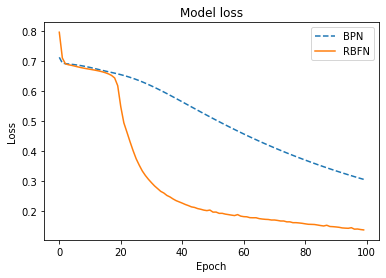

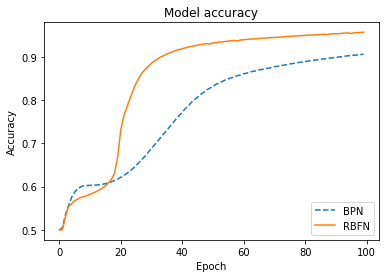

In [82]:
import matplotlib.pyplot as plt1

plt1.plot(history.history['loss'], linestyle='dashed')
plt1.plot(history_rbf.history['loss'])
plt1.title('Model loss')
plt1.ylabel('Loss')
plt1.xlabel('Epoch')
plt1.legend(['BPN', 'RBFN'], loc='upper right')
plt1.show()

plt1.plot(history.history['accuracy'], linestyle='dashed')
plt1.plot(history_rbf.history['accuracy'])
plt1.title('Model accuracy')
plt1.ylabel('Accuracy')
plt1.xlabel('Epoch')
plt1.legend(['BPN', 'RBFN'], loc='lower right')
plt1.show()

<h3>Prediction</h3>

In [58]:
pred = data_pred[['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
                    'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY']].sample(n=100)

y = np.where(pred['ARRIVAL_DELAY'].astype(int) >= 10, 1, 0)

pred["DISTANCE"] = 0
pred["DEPARTURE_DELAY"] = 0
pred["ARRIVAL_DELAY"] = 0

pred = pred.replace({"AIRLINE": le_airline})
pred = pred.replace({"ORIGIN_AIRPORT": le_airport})
pred = pred.replace({"DESTINATION_AIRPORT": le_airport})

pred = pred.values
pred = min_max_scaler.fit_transform(pred)

y_pred_bpn = classifier.predict(pred)
y_pred_bpn = np.where(y_pred_bpn > 0.5, 1, 0) 
error_bpn = np.mean( y_pred_bpn != y )

print("Error : ", error_bpn)
print("Accuracy of BPN : ", 100-(error_bpn*100), '%')

y_pred_rbf = rbf.predict(pred)
y_pred_rbf = np.where(y_pred_rbf > 0.5, 1, 0) 
error_rbf = np.mean( y_pred_rbf != y )

print("Error : ", error_rbf)
print("Accuracy of RBFN : ", 100-(error_rbf*100), '%')

Error :  0.17
Accuracy of BPN :  83.0 %
Error :  0.17
Accuracy of RBFN :  83.0 %


<h3>Confusion Martix BPN</h3>

In [59]:
y_pred_bpn = classifier.predict(test_x)
y_pred_bpn =(y_pred_bpn>0.5)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y, y_pred_bpn)

array([[30305, 22842],
       [30175, 22612]], dtype=int64)

<h3>Confusion Martix RBF</h3>

In [61]:
y_pred_rbf = rbf.predict(test_x)
y_pred_rbf =(y_pred_rbf>0.5)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y, y_pred_rbf)

array([[26457, 26690],
       [26222, 26565]], dtype=int64)

<h3>Precision Score</h3>

In [63]:
from sklearn.metrics import precision_score

train_predictions_bpn = classifier.predict(train_x)
train_predictions_bpn = np.where(train_predictions_bpn > 0.5, 1, 0) 
precision_score(train_y, train_predictions_bpn)

0.9719203112106566

In [64]:
from sklearn.metrics import precision_score

train_predictions_rbf = rbf.predict(train_x)
train_predictions_rbf = np.where(train_predictions_rbf > 0.5, 1, 0) 
precision_score(train_y, train_predictions_rbf)

0.9593673818877808

<h3>Recall Score</h3>

In [65]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions_bpn)

0.8333973516627918

In [66]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions_rbf)

0.9626645102597796

<h3>ROC Score</h3>

In [67]:
from sklearn.metrics import roc_auc_score
probabilities_bpn = classifier.predict_proba(test_x)
roc_auc_score(test_y, probabilities_bpn[:])

0.9851512110845045

In [68]:
from sklearn.metrics import roc_auc_score
probabilities_rbf = rbf.predict_proba(test_x)
roc_auc_score(test_y, probabilities_rbf[:])

0.9924097610694985

<h3>ROC Curve</h3>

Text(0, 0.5, 'True Positive Rate')

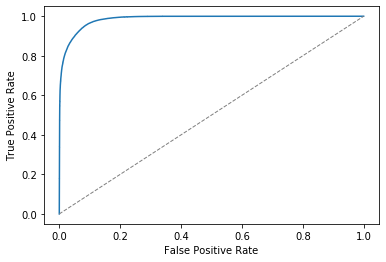

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities_bpn[:])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

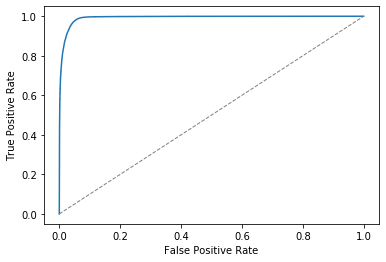

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities_rbf[:])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')